# Введение в ансамбли

In [9]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
from sklearn import metrics #метрики

from sklearn.model_selection import train_test_split

## Задание

In [10]:
wine_data = pd.read_csv('data/winequality-red.zip', sep=';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
# разделим вино на хорошее и плохое. 
#Хорошим вином будем называть вино, параметр quality которого  6, плохим — всё остальное.
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x>=6 else 0)

#Создаем матрицу признаков X и столбец с ответами y
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Бэггинг. Случайный лес (Random Forest)

In [13]:
#Создаем объект класса случайный лес
rf_wine = ensemble.RandomForestClassifier(
    n_estimators=500, #число деревьев
    criterion='gini', #критерий эффективности
    max_depth=8, #максимальная глубина дерева
    max_features='sqrt', #число признаков из метода случайных подространств
    min_samples_leaf=10, #The minimum number of samples required to be at a leaf node
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_wine.fit(X_train, y_train)

#Делаем предсказание класса
y_pred_train = rf_wine.predict(X_train)
y_pred_test = rf_wine.predict(X_test)
#Выводим отчет о метриках
print(metrics.classification_report(y_train, y_pred_train))
print()
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       603
           1       0.87      0.84      0.85       676

    accuracy                           0.85      1279
   macro avg       0.85      0.85      0.85      1279
weighted avg       0.85      0.85      0.85      1279


              precision    recall  f1-score   support

           0       0.70      0.74      0.72       141
           1       0.79      0.75      0.77       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



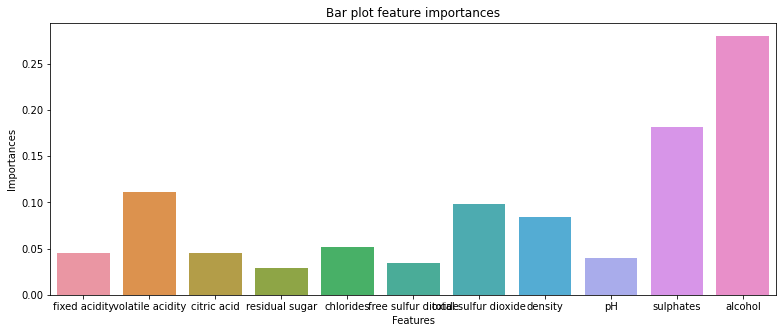

In [14]:
fig, ax = plt.subplots(figsize=(13, 5)) #фигура + координатная плоскость
feature = X_train.columns #признаки
feature_importances = rf_wine.feature_importances_ #важность признаков
#Строим столбчатую диаграмму
sns.barplot(x=feature, y=feature_importances, ax=ax);
#Добавляем подпись графику, осям абцисс и ординат
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

## Бустинг. Градиентный бустинг над деревьями решений (Gradient Boosting Decision Tree)

In [16]:
#Создаем объект класса градиентный бустинг над деревьями
gb_wine = ensemble.GradientBoostingClassifier(
    loss='deviance', #функция потерь
    learning_rate=0.1, #темп обучения
    n_estimators=200, #число деревьев
    max_depth=3, #максимальная глубина дерева
    min_samples_leaf=10, #The minimum number of samples required to be at a leaf node
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
gb_wine.fit(X_train, y_train)

#Делаем предсказание класса
y_pred_train = gb_wine.predict(X_train)
y_pred_test = gb_wine.predict(X_test)
#Выводим отчет о метриках
print(metrics.classification_report(y_train, y_pred_train))
print()
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       603
           1       0.92      0.92      0.92       676

    accuracy                           0.92      1279
   macro avg       0.92      0.92      0.92      1279
weighted avg       0.92      0.92      0.92      1279


              precision    recall  f1-score   support

           0       0.77      0.80      0.79       141
           1       0.84      0.82      0.83       179

    accuracy                           0.81       320
   macro avg       0.81      0.81      0.81       320
weighted avg       0.81      0.81      0.81       320



## Стекинг

In [19]:
#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', linear_model.LogisticRegression(
        C=0.01,
        random_state=42 #генератор случайных чисел
        )
    ),
    ('rf', ensemble.RandomForestClassifier(
        n_estimators=500, #число деревьев в лесу
        min_samples_leaf=5,
        random_state=42 #генератор случайных чисел
        )
    ),
    ('gb', ensemble.GradientBoostingClassifier(
        n_estimators=200, #число деревьев
        max_depth=3, #максимальная глубина дерева
        min_samples_leaf=5,
        random_state=42 #генератор случайных чисел
        )
    )
]

#Создаем объект класса стекинг
stack = ensemble.StackingClassifier(
    estimators,
    final_estimator=linear_model.LogisticRegression(random_state=42)
)
#Обучаем модель
stack.fit(X_train, y_train)

#Делаем предсказание класса
y_pred_train = stack.predict(X_train)
y_pred_test = stack.predict(X_test)
#Выводим отчет о метриках
print(metrics.classification_report(y_train, y_pred_train))
print()
print(metrics.classification_report(y_test, y_pred_test))

/home/russ174/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/russ174/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       603
           1       0.93      0.93      0.93       676

    accuracy                           0.93      1279
   macro avg       0.93      0.93      0.93      1279
weighted avg       0.93      0.93      0.93      1279


              precision    recall  f1-score   support

           0       0.76      0.78      0.77       141
           1       0.82      0.80      0.81       179

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320

